In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

folder_path = "/content/results"

dataframes = []

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['model'] = filename[:-4].replace("results_of_", "").replace("checkpoint", "cp")
        if 'option_e' in df.columns:
          df = df.drop('option_e', axis=1)
        dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

df = combined_df.reset_index(drop=True)
df.head()

,question,option_a,option_b,option_c,option_d,correct_option,id,can_be_guessed,model
0,Which orthotic category is indicated for impro...,Orthotic de décharge ou de semi-décharge,Orthotic de fonction stabilisation,Orthotic de posture static,Orthotic de fonction cervical,C,OIC-328-06-B,False,cp-40
1,What is the main purpose of spa resorts in Fra...,To serve as popular tourist destinations for r...,To treat patients with chronic pathologies inc...,To offer educational programs on health and we...,To conduct scientific research in hydrotherapy,B,OIC-328-12-B,False,cp-40
2,What is the primary goal of orthotic treatment...,To facilitate rapid recovery,To correct anatomical deformities,To provide functional support and compensation,To prepare for future surgical procedures,C,OIC-328-05-A,False,cp-40
3,Which of the following is NOT a core functiona...,Sleeve,Socket,Intermediate effectors,Aesthetic trim,D,OIC-328-08-A,True,cp-40
4,"According to the definition provided in ANSM, ...",A software application that assists doctors in...,A pacemaker intended to regulate the patient's...,A smartphone app designed to track physical ac...,A wheelchair that aids in mobility for individ...,A,OIC-328-02-A,False,cp-40


In [ ]:
value_counts = df.groupby('model')['can_be_guessed'].value_counts().unstack(fill_value=0)
ratios = (value_counts[False] / (value_counts[True] + value_counts[False])).rename("ratio")
ratios['gpt-4'] = 0.806
sorted_ratios = ratios.sort_values(ascending=True)
sorted_ratios

,ratio
model,
cp-100,0.671756
cp-10,0.732824
cp-70,0.732824
base_model,0.740458
best_model,0.740458
cp-20,0.740458
cp-90,0.740458
cp-30,0.748092
cp-80,0.748092


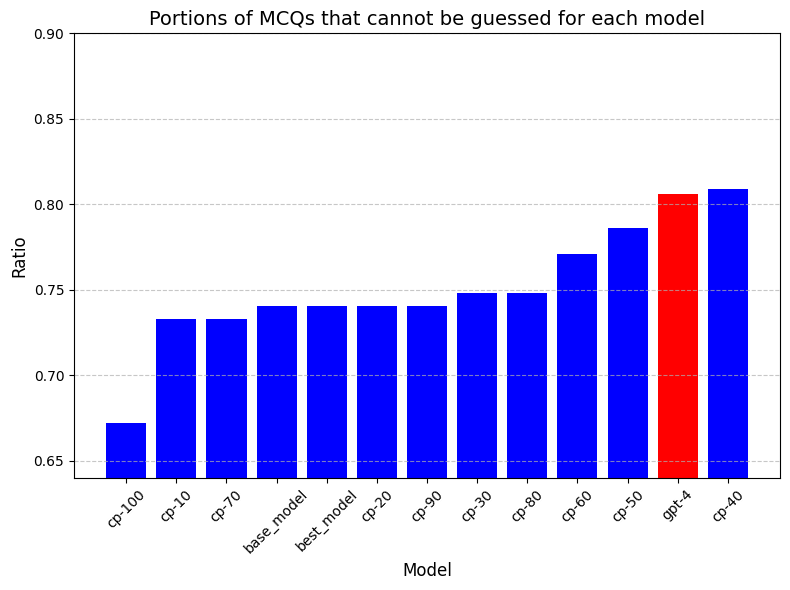

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['red' if index == 'gpt-4' else 'blue' for index in sorted_ratios.index]
plt.bar(sorted_ratios.index, sorted_ratios.values, color=colors)

plt.title("Portions of MCQs that cannot be guessed for each model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Ratio", fontsize=12)

plt.ylim(0.64, 0.9)
plt.xticks(rotation=45)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

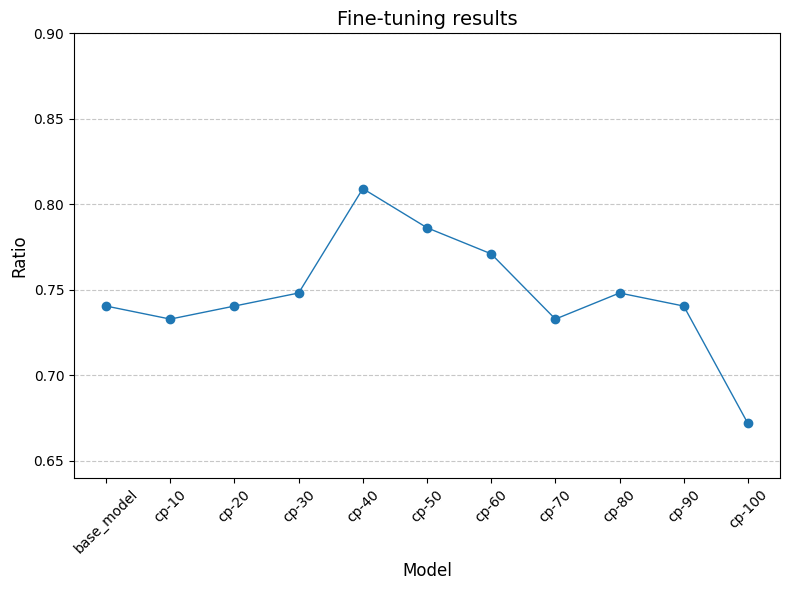

In [ ]:
filtered_ratios = sorted_ratios.drop(['gpt-4', 'best_model'], errors='ignore')
sorted_filtered_ratios = filtered_ratios.sort_index()
cp_100_value = sorted_filtered_ratios['cp-100']
sorted_filtered_ratios = sorted_filtered_ratios.drop('cp-100')
sorted_filtered_ratios['cp-100'] = cp_100_value

plt.figure(figsize=(8, 6))
plt.plot(sorted_filtered_ratios.index, sorted_filtered_ratios.values, marker='o', linestyle='-', linewidth=1)

plt.title("Fine-tuning results", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Ratio", fontsize=12)

# Rotating x-ticks for readability
plt.ylim(0.64, 0.9)
plt.xticks(rotation=45)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()